# Natural Language Processing(NLP)
The working procedure of NLP can be divided into three major steps:


 
- **Step 1:** Preprocessing of text that includes Cleaning the data, Tokenizing, Stemming, Parts of Speech(POS) Tagging, Lemmatization, Name Entity Recognition (NER)
- **Step 2:** This step is for vectorizing data, that is encoding text into integer i.e. numeric form to create feature vector.
- **Step 3:** The final step is to fit a suitable classification algorithm to the dataset and make the predictions.

We can implement all these steps using NLP libraries. Some of the popular NLP libraries are

- Natural Language Toolkit-NLTK
- SpaCy
- Stanford NLP
- OpenNLP


In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Cleaning the texts
import re
import nltk

# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

We are going to use `Restaurant_Reviews.tsv` dataset. The dataset contains 1000 reviews from customers. These reviews are identified with values `0` and `1` whether they are positive or negative. `0` means the review is positive and `1` means the review is positive.

This dataset looks different than other datasets as it is in tsv(tab-separated value) format. For NLP task we can not use csv(comma-separated value) files. This is because of the strings may contain commas, which will confuse our model.

It contains two columns namely `Review` and `Liked`. They are separated by a tab. Now our task is to preprocess this data. Then we will implement any of the classification algorithms to classify the reviews whether it is positive or negative.

As our dataset is in tsv format, we need to clarify that in the delimiter parameter. The reviews contain double quotes, that may cause confusion to the model. So we set the quoting parameter to 3 to avoid this problem.

In [2]:
'''
Importing the dataset
As our dataset is in tsv format, we need to clarify that in the delimiter parameter.
The reviews contain double quotes, that may cause confusion to the model.
So we set the quoting parameter to 3 to avoid this problem.
'''
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)
dataset

Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]

we will clean the texts using the `NLTK library` from Python. The texts contain a lot of useless words which have no impact on the characteristic of the review, we need to get rid of those words like wow, place, texture, etc. 
Then we need to perform stemming that is we will take the root of a word like `loved`, `loving`, `lovely`, etc. all can be replaced by the same word `love`. The texts also contain some common words like `was`, `that`, `this`, `it`, `is`, etc. which are known as `stopwords` and have no use at all. So we will remove those words using the stopwords package from the NLTK library. 
We only consider the English words and also take all the words into lowercase. 

In [3]:
# Cleaning the texts
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



We proceed to the most important part of NLP, creation of the bag of words model.

**Bag of words is a multiset of words which will help us to analyze the different reviews and classify them.**

In [4]:
# Creating the Bag of Words model
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values

We have completed preprocessing the texts and creating the bag of words model. Now, we split this preprocessed dataset into training and test sets. 

In [5]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

Let's fit a classification algorithm to our training set. Here we will use Naive Bayes which is one of the most popular and most effective classification algorithms for NLP.

In [6]:
# Fitting Naive Bayes to the Training set
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [7]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [8]:
Y_test = pd.DataFrame(y_test,columns={'Y_test_actual'})
Y_test['Y_perdict'] = pd.DataFrame(y_pred,columns={'Y_perdict'})
Y_test.head(50)

Y_test_actual  Y_perdict
0               0          1
1               0          1
2               0          1
3               0          0
4               0          0
5               0          1
6               1          1
7               0          1
8               0          1
9               1          1
10              1          1
11              1          1
12              0          1
13              1          1
14              1          1
15              1          1
16              0          0
17              0          0
18              0          0
19              1          1
20              0          0
21              1          0
22              1          1
23              0          1
24              0          1
25              1          0
26              1          1
27              1          1
28              1          1
29              0          0
30              1          1
31              1          1
32              1          1
33              1          1
34              1          1
35              0          0
36              0          1
37              0          0
38              0          1
39              1          1
40              1          1
41              0          1
42              1          1
43              0          0
44              0          0
45              0          0
46              0          1
47              0          1
48              0          0
49              0          0

In [9]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

In [10]:
pd.DataFrame(cm,index={'Liked', 'disliked'},columns={'Liked', 'disliked'})

Liked  disliked
Liked        55        42
disliked     12        91

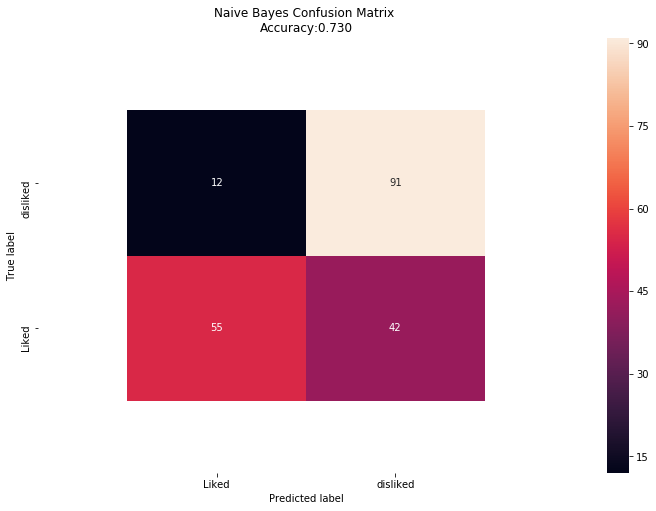

Liked  disliked
Liked        55        42
disliked     12        91

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['Liked','disliked'], 
                     columns = ['Liked','disliked'])

plt.figure(figsize=(12,8))
sns.heatmap(cm_df, annot=True)
plt.title('Naive Bayes Confusion Matrix \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xlim(-0.5, 2.5)
plt.ylim(-0.5, 2.5)

plt.show()
cm_df